## Preguntas de investigación
1. ¿Cómo varía la prevalencia de diabetes según las categorías de BMI?  
2. ¿Cuál es la relación entre la edad y la probabilidad de diabetes por sexo?  
3. ¿El nivel de actividad física se asocia con un menor riesgo de diabetes?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"diabetes_012_health_indicators_BRFSS2015.csv")
df['Diabetes_binary'] = df['Diabetes_012'].map({0:0, 1:1, 2:1})
df['BMI_cat'] = pd.cut(df['BMI'],
                       bins=[0, 18.5, 25, 30, 100],
                       labels=['Underweight','Normal','Overweight','Obese'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary,BMI_cat
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0,Obese
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0,Normal
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0,Overweight
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0,Overweight
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0,Normal


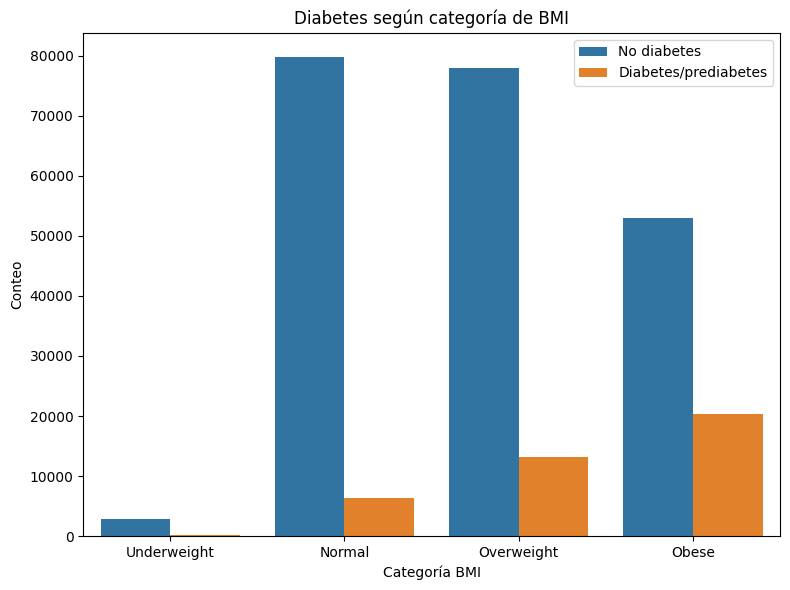

In [3]:
# 1. Prevalencia de diabetes por categoría de BMI

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='BMI_cat', hue='Diabetes_binary')
plt.title('Diabetes según categoría de BMI')
plt.xlabel('Categoría BMI')
plt.ylabel('Conteo')
plt.legend(['No diabetes','Diabetes/prediabetes'])
plt.tight_layout()
plt.show()

**Interpretación:** Se observa cómo la proporción de casos de diabetes/prediabetes crece progresivamente de "Underweight" a "Obese".

In [4]:
# 2. Relación entre edad y diabetes por sexo
age_sex = df.groupby(['Sex','Diabetes_binary'])['Age'].mean().unstack()
age_sex.rename(index={0:'Mujer',1:'Hombre'}, inplace=True)
age_sex

Diabetes_binary,0,1
Sex,,
Mujer,7.899338,9.296788
Hombre,7.639470,9.398007


**Interpretación:** Las personas con diabetes tienden a ser mayores; esta tendencia se mantiene tanto en mujeres como en hombres. Los hombres presentan mas casos.

In [5]:
# 3. Actividad física y riesgo de diabetes
phys_rate = df.groupby('PhysActivity')['Diabetes_binary'].mean()
phys_rate

PhysActivity
0.0    0.235557
1.0    0.132498
Name: Diabetes_binary, dtype: float64

**Interpretación:** La tasa de diabetes/prediabetes es menor entre quienes reportan actividad física en los últimos 30 días.